In [4]:
import re
import unicodedata
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import acquire
import prepare

from env import user, password, host

[nltk_data] Downloading package stopwords to /Users/jarad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Spam Data

Load the spam data set.

In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [6]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels


,n,percent
ham,4825,0.865937
spam,747,0.134063


In [7]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))


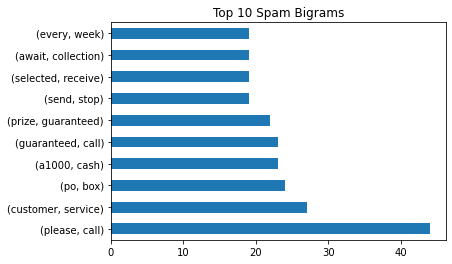

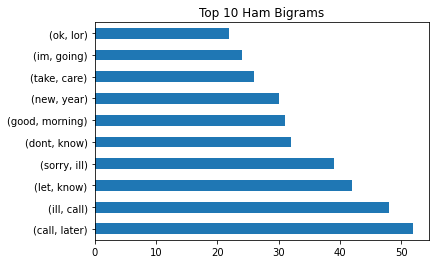

In [14]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(10).plot.barh()
plt.title("Top 10 Spam Bigrams")
plt.show()
pd.Series(nltk.bigrams(ham_words)).value_counts().head(10).plot.barh()
plt.title("Top 10 Ham Bigrams")
plt.show()


Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [12]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Ten Most Common Bigrams Overall')

AttributeError: 'list' object has no attribute 'split'

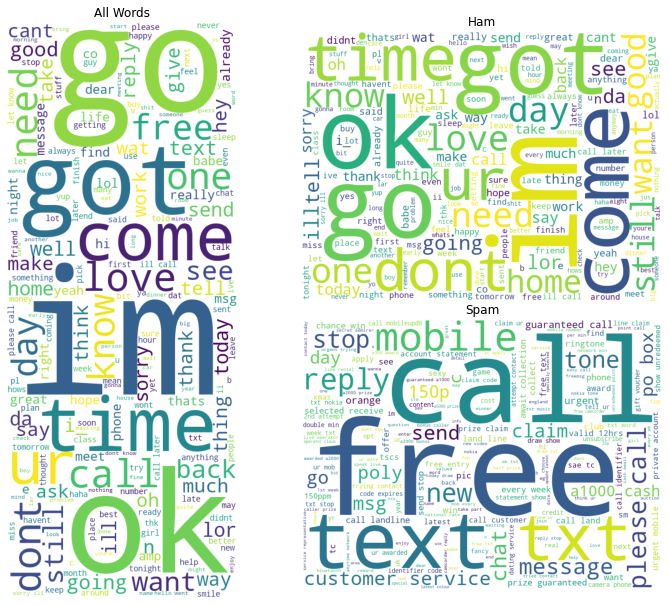

In [8]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')


Is there any overlap in the bigrams for the spam data and the ham data?

The biggest overlap is the word call

In [15]:
news = acquire.get_news_articles()

In [17]:
news.head()

,topic,title,author,content
0,business,Don't eff this up: Bezos recalls warning from ...,Ridham Gambhir,Ahead of the debut of The Lord of the Rings' p...
1,business,US sought records on Binance CEO for crypto mo...,Ashley Paul,US prosecutors sought communication records in...
2,business,Price of commercial LPG cylinders cut by up to...,Ridham Gambhir,State-owned fuel retailers on Thursday announc...
3,business,Chairman of Russia's 2nd largest oil firm dies...,Ridham Gambhir,The chairman of Russia's second-largest oil pr...
4,business,SpiceJet shares fall nearly 15% after CFO resi...,Ridham Gambhir,SpiceJet shares declined nearly 15% during Thu...


In [18]:
clean_news = clean(''.join(news.content))

In [19]:
clean_news = prepare.tokenize(clean_news)

In [20]:
clean_news = prepare.lemmatize(clean_news)

In [21]:
clean_news = prepare.remove_stopwords(clean_news)

In [22]:
clean_news

"['ahead','debut','lord','ring','prequel','ring','power','amazon','prime','video','jeff','bezos','revealed','conversation','son','said','son','came','one','day','looked','eye','sincerely','said','dad','please','dont','eff','upand','rightus','prosecutor','sought','communication','record','involving','binance','ceo','changpeng','zhao','along','extensive','internal','record','binances','antimoney','laundering','check','reuters','reported','binance','asked','voluntarily','hand','message','zhao','12','executive','partner','prosecutor','sought','record','instruction','document','destroyed','altered','removed','binances','filesstateowned','fuel','retailer','thursday','announced','reduction','price','commercial','lpg','cylinder','today','19kg','commercial','lpg','cylinder','cheaper','9150','delhi','available','1885','instead','earlier','197650','apart','delhi','price','reduced','100','kolkata','chennai','mumbaithe','chairman','russia','secondlargest','oil','producer','lukoil','died','thursday'

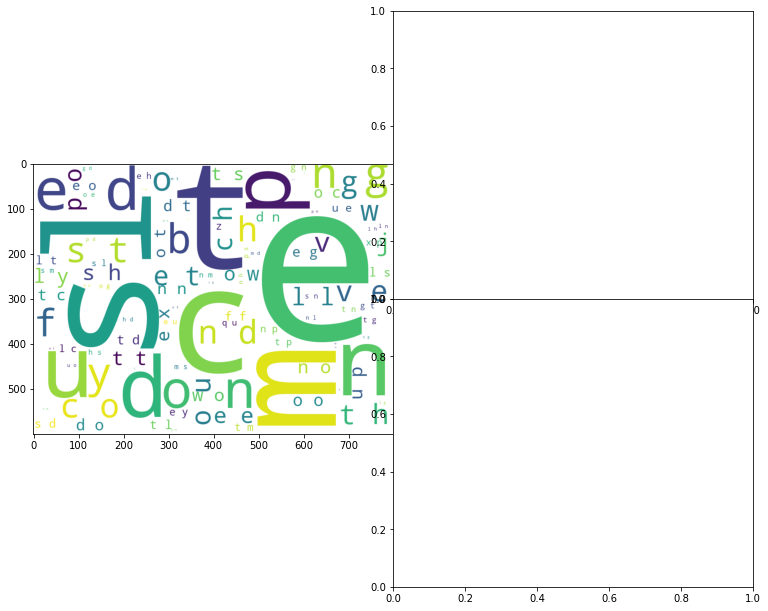

In [23]:
news_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(clean_news))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(news_cloud)